<a id = 'table_of_content'></a>
0. [Import_libraries](#imports)
1. [Import_Data](#import_data)
2. [Data_exploration](#Data_exploration)
3. [Data_cleaning](#Data_cleaning)
4. [Data_preparation](#Data_preparation)
5. [Benchmark_modeling](#Benchmark_modeling)
6. [Feature_engineering](#Feature_engineering)
7. [](#)
8. [](#)

# 0. Import_Libraries <a id= 'imports'></a>
[Back_to_top](#imports)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
# to see the plots in notebooks

# 1. Import_Data <a id= 'import_data'></a>
[Back_to_top](#imports)

In [2]:
# taxi_df = pd.read_parquet("data\yellow_tripdata_2023-01.parquet")
taxi_jan_2023 = pd.read_parquet("data\yellow_tripdata_2023-01.parquet")
taxi_data = pd.concat([taxi_jan_2023])


In [3]:
#yellow_tripdata_2023-01.parquet
#taxi_df.head()
print(taxi_data.shape)
taxi_data.head()

(3066766, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


# 2. Data_exploration <a id= 'Data_exploration'></a>
[Back_to_top](#imports)

In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [4]:
taxi_data = taxi_data[[ 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [6]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


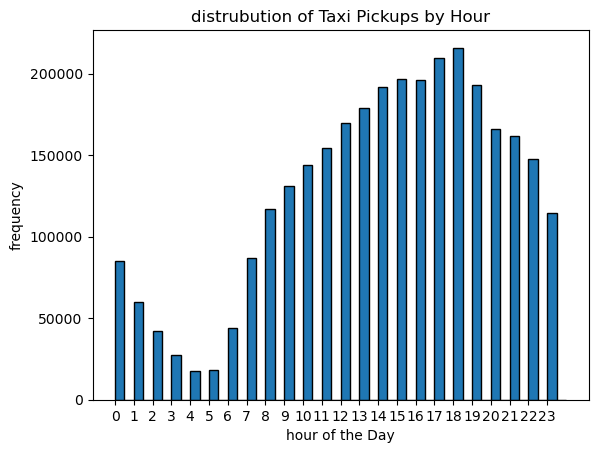

In [15]:
import matplotlib.pyplot as plt
# taxi_data.tpep_pickup_datetime.hist(figsize = (20,10), bins = 5)
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
pickup_hours = taxi_data['tpep_pickup_datetime'].dt.hour
plt.hist(pickup_hours, bins = 48, range= (0,24), edgecolor = 'black')
plt.xlabel('hour of the Day')
plt.ylabel('frequency')
plt.title('distrubution of Taxi Pickups by Hour')
plt.xticks(range(0,24))
plt.show()


# taxi_data.tpep_pickup_datetime.hist(figsize = (20,10), bins = 5)
# taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])

# # Extract the hour component from the datetime column
# pickup_hours = taxi_data['tpep_pickup_datetime'].dt.hour

# # Plot the histogram of pickup hours
# plt.hist(pickup_hours, bins=48, range=(0, 24), edgecolor='black')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Frequency')
# plt.title('Distribution of Taxi Pickups by Hour')
# plt.xticks(range(0, 24))
# plt.show()

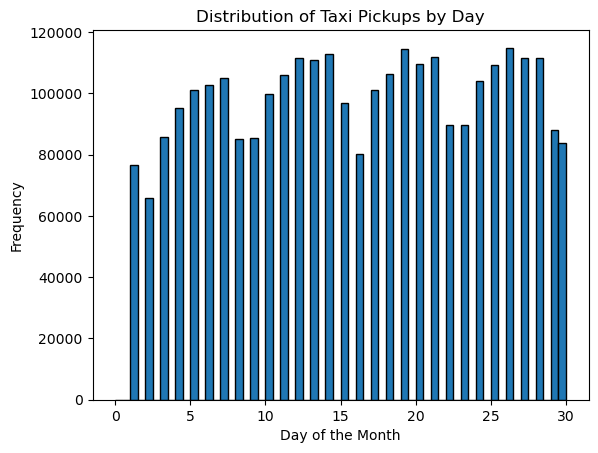

In [27]:
# taxi_data.head() #tpep_pickup_datetime

taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
pickup_days = taxi_data['tpep_pickup_datetime'].dt.day
plt.hist(pickup_days, bins = 60, range = (0,30), edgecolor = 'black' )
plt.title('Distribution of Taxi Pickups by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
# plt.xticks(range(0,30))
plt.show()


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

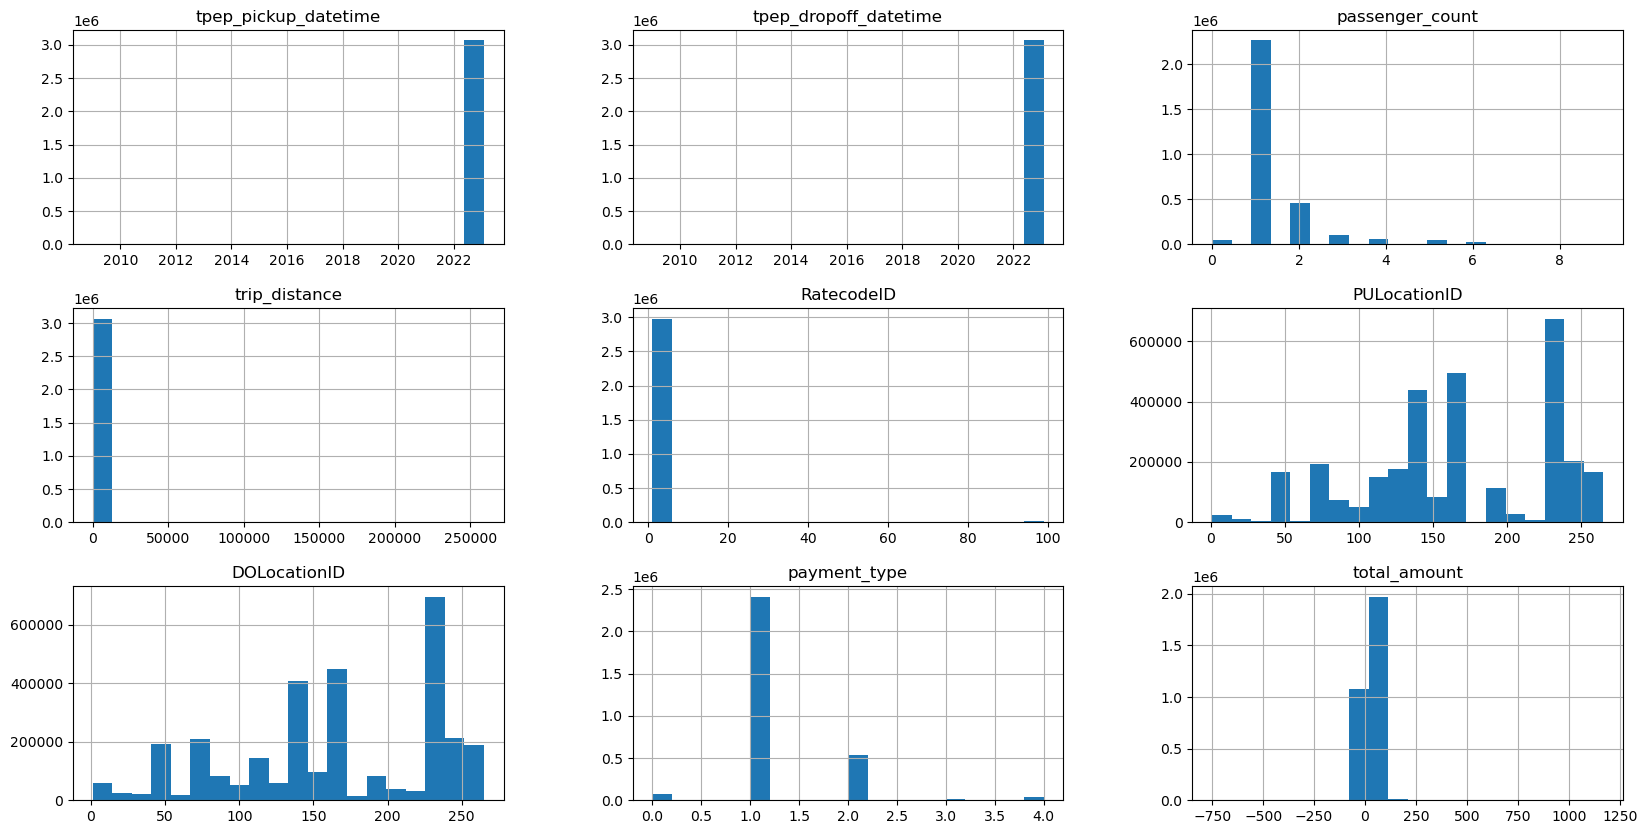

In [42]:
taxi_data.hist(figsize = (20,10), bins = 20)

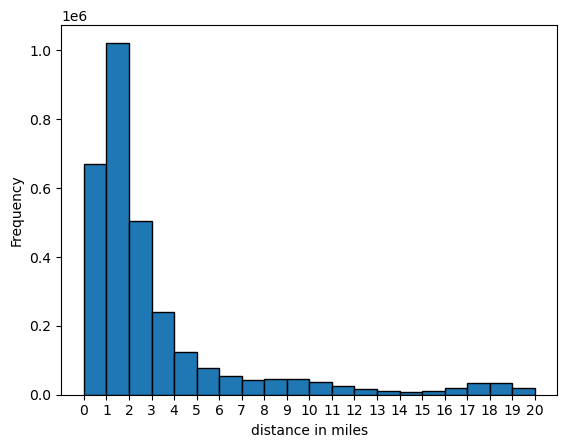

In [25]:
import matplotlib.pyplot as plt

# taxi_data.trip_distance.hist(figsize = (10,5),bins= 20, range= (0,20))
distance = taxi_data['trip_distance']
plt.hist(distance, bins= 20, range= (0,20), edgecolor = 'black')
plt.xlabel('distance in miles')
plt.ylabel('Frequency')
plt.xticks(range(0,21))
plt.show()

I would have kept the breakdown of the fares for example a large tip might skew the total amount. Also it would be good to explore tipping behaviour are individuals more likely to tip or groups day or night etc. Maybe I’ve missed some of the series

In [5]:
taxi_data['RatecodeID'].value_counts()

1.0     2839305
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: RatecodeID, dtype: int64

<Axes: >

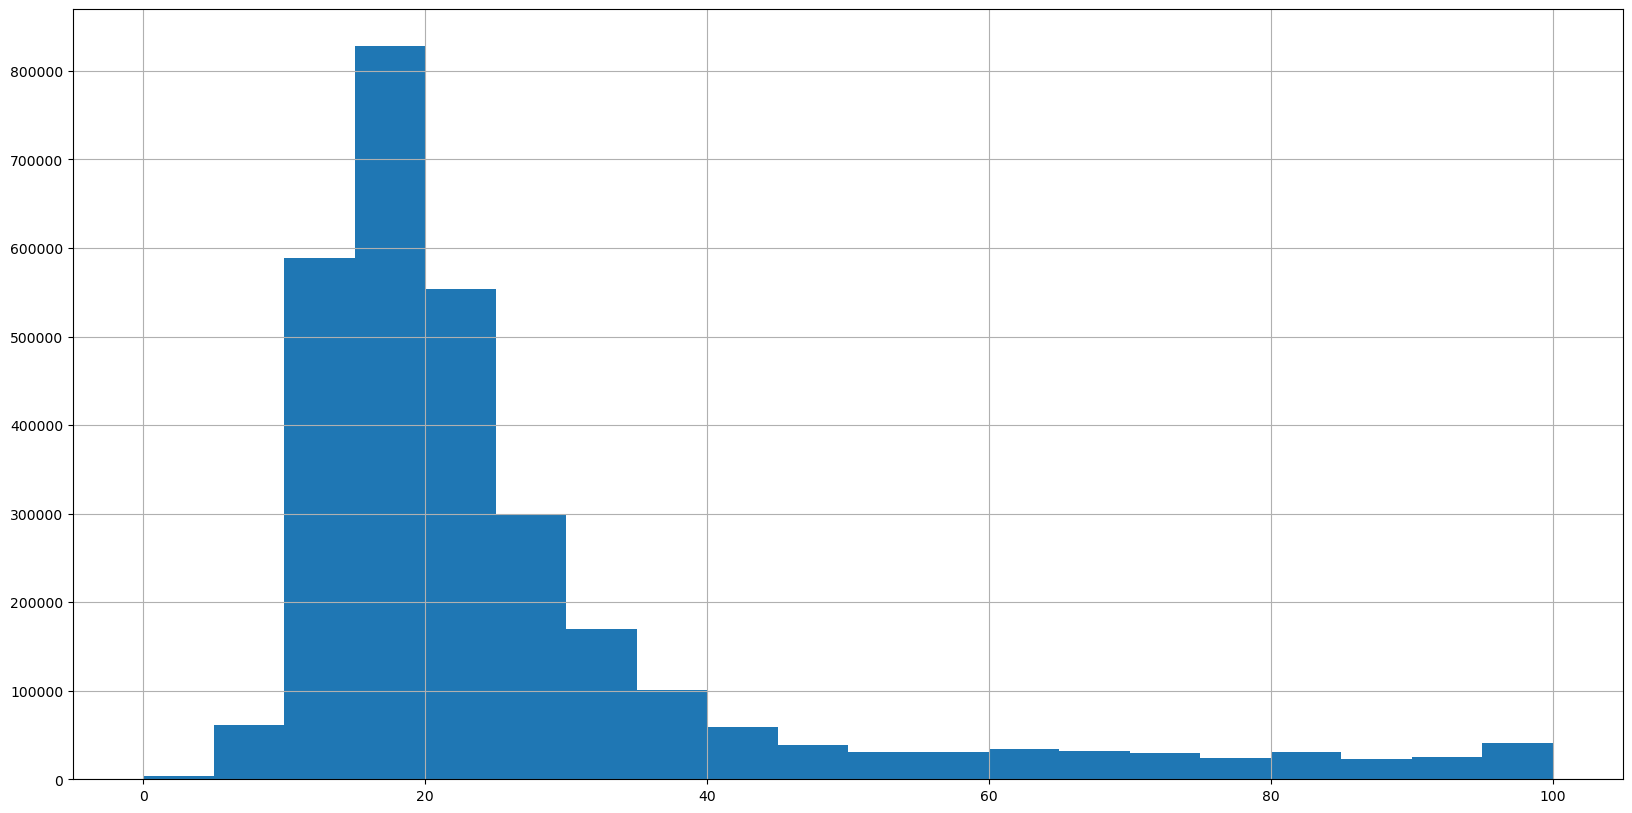

In [12]:
taxi_data.total_amount.hist(figsize = (20,10), bins = 20, range = (0,100))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='index', ylabel='total_amount'>

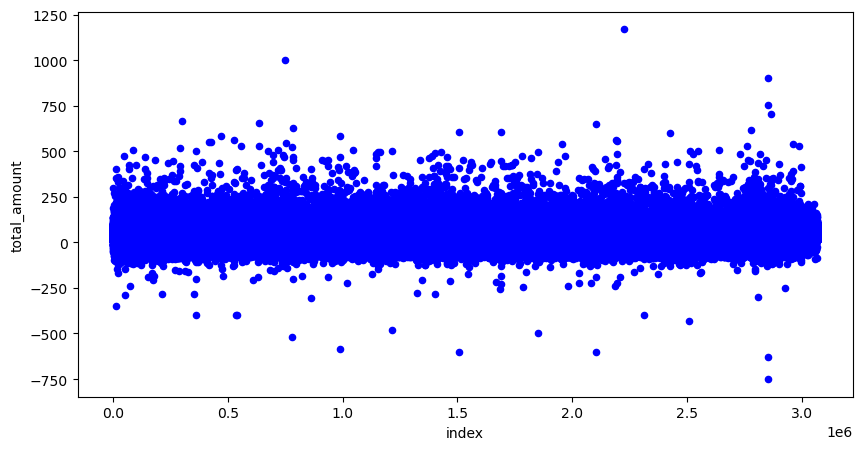

In [26]:
# taxi_data.reset_index().plot(kind = 'scatter',x = 'index', y = 'total_amount', figsize= (10,5))
taxi_data.reset_index().plot(kind='scatter', x='index', y='total_amount', c='blue', figsize=(10, 5))


(25204, 9)


<Axes: xlabel='index', ylabel='total_amount'>

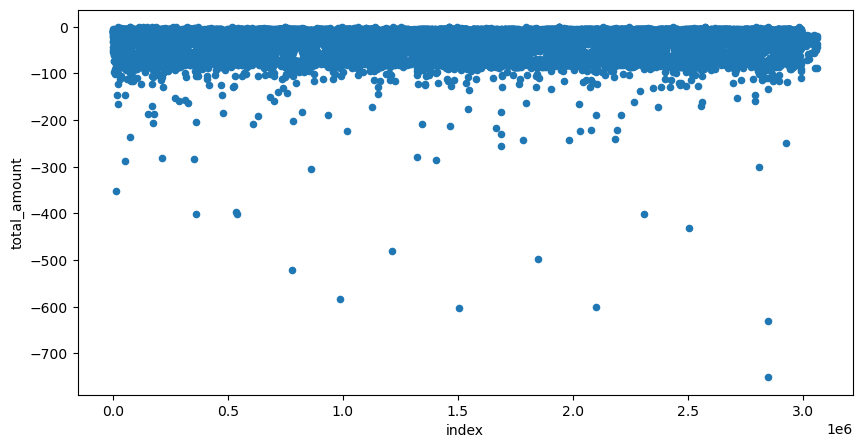

In [27]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind = 'scatter', figsize = (10,5), x= 'index', y = 'total_amount')

In [29]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
132,2023-01-01 00:28:29,2023-01-01 00:31:03,1.0,0.42,1.0,233,229,4,-10.1
263,2023-01-01 00:20:18,2023-01-01 00:27:56,2.0,1.19,1.0,142,50,4,-14.3
324,2023-01-01 00:52:22,2023-01-01 01:14:03,1.0,4.89,1.0,238,167,4,-30.4
620,2023-01-01 00:06:39,2023-01-01 00:10:02,1.0,0.52,1.0,237,237,2,-10.1
923,2023-01-01 00:34:39,2023-01-01 00:40:25,2.0,0.85,1.0,79,113,4,-12.2


In [32]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

4    14751
2     5853
3     4532
0       47
1       21
Name: payment_type, dtype: int64

In [37]:
taxi_data.shape

(3066766, 9)

In [41]:
taxi_data[taxi_data['total_amount']<0].shape

(25204, 9)

In [37]:
print(taxi_data[taxi_data['total_amount']==0].shape)
# taxi_data[taxi_data['total_amount']==0].head()
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

(568, 9)


1    227
2    128
4    123
3     84
0      6
Name: payment_type, dtype: int64

In [45]:
taxi_data[taxi_data['total_amount']>250].shape

(746, 9)

In [44]:
taxi_data['total_amount'].mean()

27.02038310708492

In [ ]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

In [33]:
taxi_data['payment_type'].value_counts()

1    2411462
2     532241
0      71743
4      33297
3      18023
Name: payment_type, dtype: int64

# 3. Data_cleaning <a id= 'Data_cleaning'></a>
[Back_to_top](#imports)

In [50]:
taxi_data_filtered = taxi_data[  (taxi_data['total_amount']>0) & (taxi_data['total_amount']<250)  ]

In [52]:
taxi_data_filtered.shape
# 26,521 data pointes ignored

(3040245, 9)

In [55]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71690
trip_distance                0
RatecodeID               71690
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

# 4. Data_preparation <a id= 'Data_preparation'></a>
[Back_to_top](#imports)

In [67]:
taxi_data_prep = taxi_data_filtered.copy()
# making a deep copy of data so it original can be used in case of disaster
# deep copy ( completely copy everthing) vs shallow copy ( copy only addresses, operations get reflected on both data variables)


In [68]:
taxi_data_prep.dtypes
# check the types of columns if they are not correct make the correct e.g datetime could have been in object type
# ratecode_id is 1,2... the relation of (1<2 ) doesn't exits but for model its "int" so e change it to "str"

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [69]:
taxi_data_prep['tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prep['tpep_pickup_datetime'])
taxi_data_prep.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prep.loc[:,'tpep_pickup_datetime'])

taxi_data_prep.loc[:, 'RatecodeID'] = taxi_data_prep['RatecodeID'].astype(str)
taxi_data_prep.loc[:, 'PULocationID'] = taxi_data_prep['PULocationID'].astype(str)
taxi_data_prep.loc[:, 'DOLocationID'] = taxi_data_prep['DOLocationID'].astype(str)
taxi_data_prep.loc[:, 'payment_type'] = taxi_data_prep['payment_type'].astype(str)

In [70]:
taxi_data_prep.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [73]:
taxi_data_prep['transaction_date'] = pd.to_datetime(taxi_data_prep['tpep_pickup_datetime']).dt.date
taxi_data_prep['transaction_year'] = taxi_data_prep['tpep_pickup_datetime'].dt.year
taxi_data_prep['transaction_month'] = taxi_data_prep['tpep_pickup_datetime'].dt.month
taxi_data_prep['transaction_day'] =  taxi_data_prep['tpep_pickup_datetime'].dt.day
taxi_data_prep['transaction_hour'] = taxi_data_prep['tpep_pickup_datetime'].dt.hour

In [74]:
taxi_data_prep.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,161,141,2,14.30,2023-01-01,2023,1,1,0
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,43,237,1,16.90,2023-01-01,2023,1,1,0
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,48,238,1,34.90,2023-01-01,2023,1,1,0
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,138,7,1,20.85,2023-01-01,2023,1,1,0
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,107,79,1,19.68,2023-01-01,2023,1,1,0


In [77]:
taxi_data_prep['transaction_year'].value_counts()


2023    3040208
2022         36
2008          1
Name: transaction_year, dtype: int64

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_year'}>],
       [<Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_hour'}>]], dtype=object)

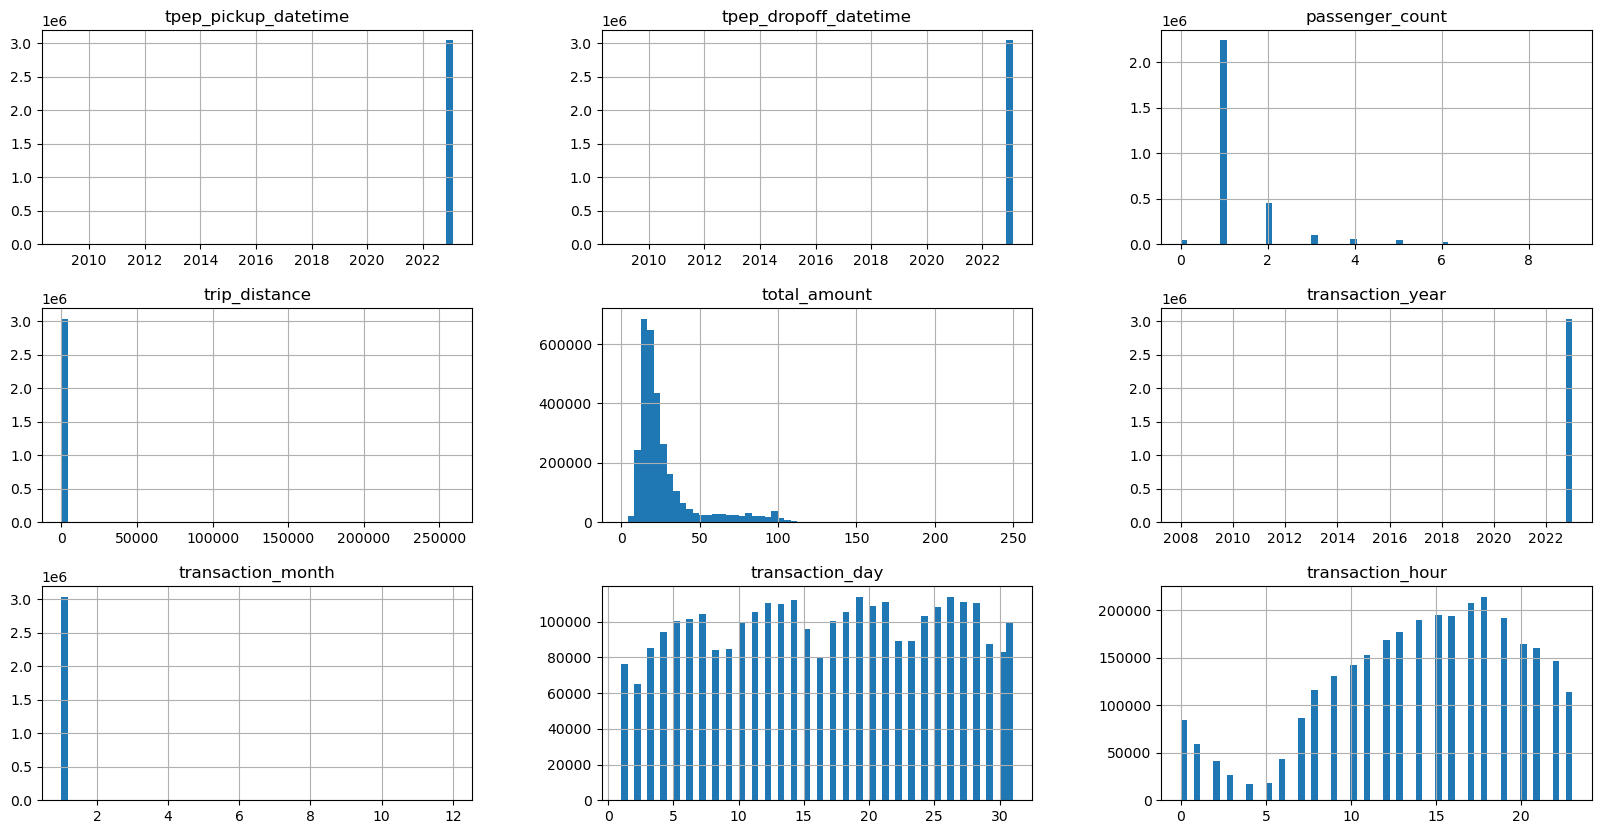

In [78]:
taxi_data_prep.hist(figsize= (20,10), bins= 60 )

In [80]:
# Data cleaning for month 1 and year 2023
taxi_data_prep = taxi_data_prep [taxi_data_prep['transaction_year']==2023]
taxi_data_prep = taxi_data_prep [taxi_data_prep['transaction_month']==1]

To predict how much money people spend in every hour of the days of month,
which columns are need and which are not.
what are types of columns available( numerical and categorical)

In [86]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['total_amount','trip_distance']
all_needed_columns = categorical_columns + numerical_columns 

In [87]:
main_taxi_df = taxi_data_prep[all_needed_columns] 
main_taxi_df.shape
main_taxi_df.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,total_amount,trip_distance
0,161,2023-01-01,1,1,0,14.30,0.97
1,43,2023-01-01,1,1,0,16.90,1.10
2,48,2023-01-01,1,1,0,34.90,2.51
3,138,2023-01-01,1,1,0,20.85,1.90
4,107,2023-01-01,1,1,0,19.68,1.43


Aggregate data Points
Time to think what are we going to predict and depending on it, we transform our data to a certain format.
look at numerical values and take their average based on location, transaction date.b

In [90]:
taxi_groupby_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_groupby_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_groupby_region.shape)
taxi_groupby_region.head()

(71425, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,total_amount,trip_distance,count_of_transactions
0,1,2023-01-01,1,1,5,118.1100,0.0,1
1,1,2023-01-01,1,1,8,100.0000,0.0,1
2,1,2023-01-01,1,1,11,115.2000,0.0,1
3,1,2023-01-01,1,1,12,148.3150,0.0,2
4,1,2023-01-01,1,1,13,146.0475,8.0,4


<Axes: >

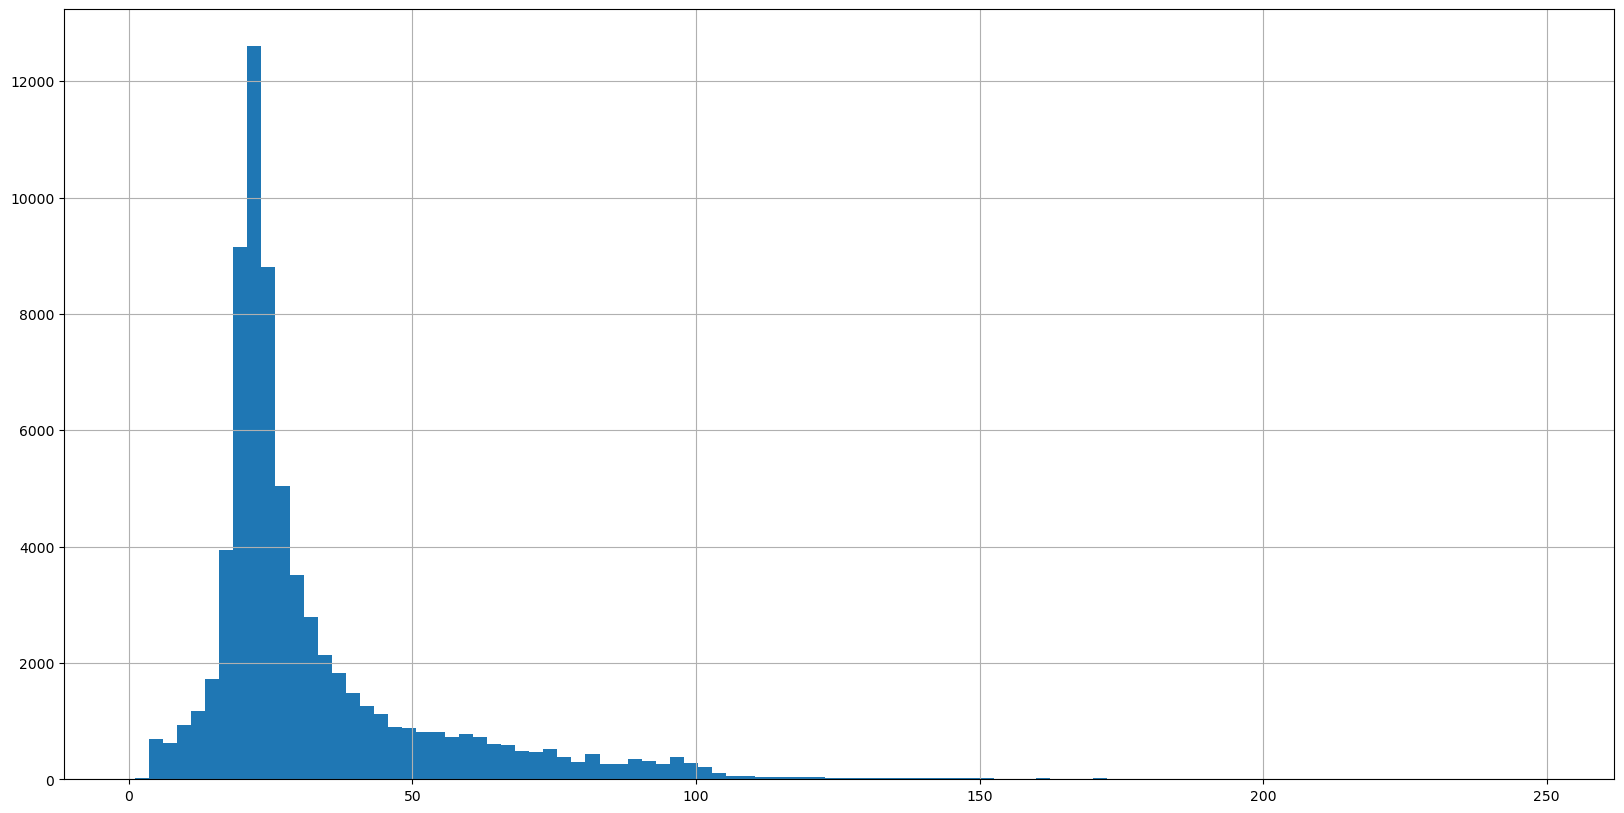

In [92]:
taxi_groupby_region['total_amount'].hist(figsize = (20,10), bins = 100)

<Axes: >

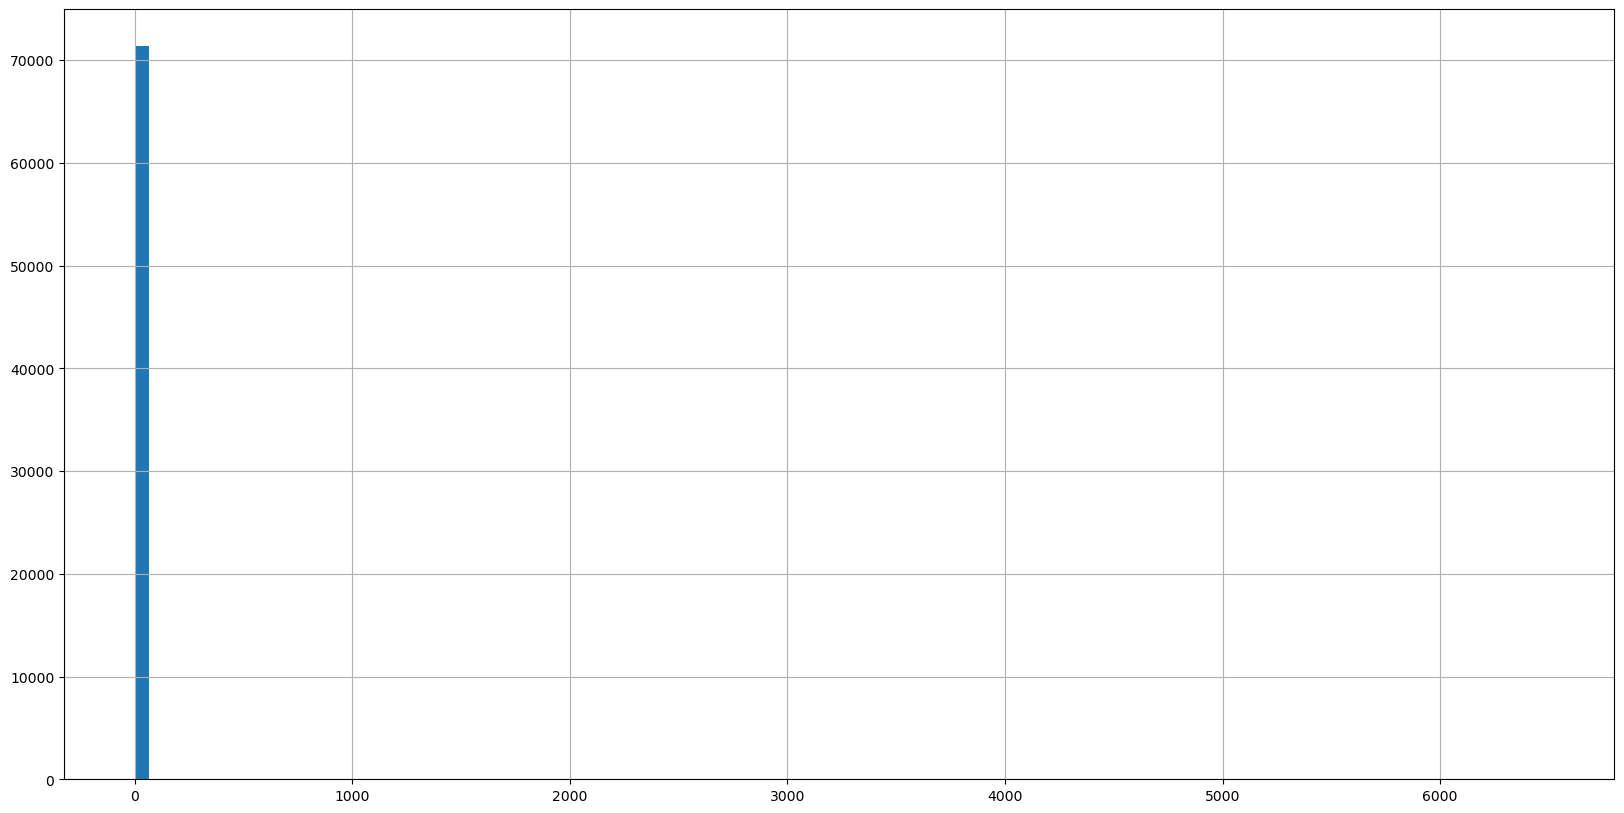

In [91]:
taxi_groupby_region['trip_distance'].hist(figsize = (20,10), bins = 100)

# 5. Benchmark_modeling <a id= 'Benchmark_modeling'></a>
[Back_to_top](#imports)

# 6. Feature_engineering <a id='Feature_engineering'></a>
[Back_to_top](#imports)